[nltk_data] Downloading package stopwords to C:\Users\Miguel
[nltk_data]     Oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


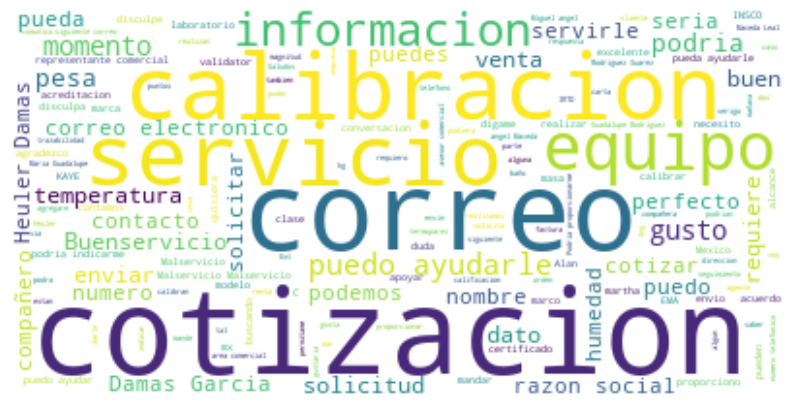

In [8]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Descargar las stopwords de NLTK si es la primera vez que lo usas
nltk.download('stopwords')

# Cargar las stopwords en español 
stop_words = set(stopwords.words('spanish'))  # Se puede cambiar 'spanish' por 'english'

# Agregar stopwords adicionales que consideres innecesarias
custom_stopwords = {'soporte', 'usuario', 'inscomexico', 'hola','muchas', 'com', 'solo', 'usted', 'ustedes', 'buenas', 'tarde', 'asi', 'mas', 'tardes', 'gracia', 'dia', 'gracias', 'buenos', 'puede', 'favor', 'si', 'claro', 'dias'}  # Añade más palabras aquí si es necesario
stop_words.update(custom_stopwords)

# Leer el archivo Chat_Odoo.txt
with open("Chat_Odoo.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Crear la nube de palabras eliminando las stopwords
wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=150).generate(text)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Quitar los ejes
plt.show()
